In [209]:
%load_ext autoreload 
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report

plt.style.use("seaborn-v0_8")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load diabetes data

In [210]:
diabetes_df = pd.read_csv("/mnt/dl/machine_learning_dataset/diabetes_dataset/diabetes.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [211]:
X = diabetes_df[diabetes_df.columns[:-1]]
y = diabetes_df['Outcome']

In [212]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [213]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [214]:
X.astype(float)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


(array([500., 268.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

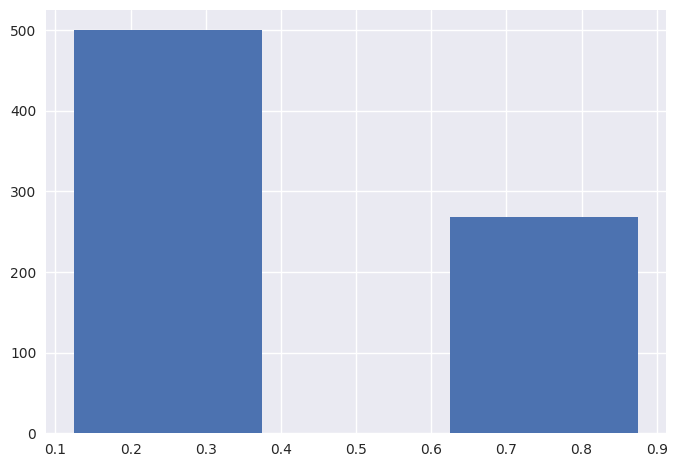

In [215]:
plt.hist(y, bins=2, rwidth=0.5)

In [216]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=0)

In [217]:
X_train.shape, X_valid.shape

((691, 8), (77, 8))

In [218]:
y_train.shape

(691,)

In [219]:
# test with only glucose as feature
feature = "Glucose"
x1_train, x1_valid = X_train[feature], X_valid[feature]
y1_train, y1_valid = y_train.copy(), y_valid.copy()


In [220]:
x1_train

499    154
720     83
556     97
583    100
150    136
      ... 
763    101
192    159
629     94
559     85
684    136
Name: Glucose, Length: 691, dtype: int64

In [221]:
lin1 = LogisticRegression(penalty="l2",solver="saga", max_iter=1000)

In [222]:
lin1.fit(x1_train.to_numpy().reshape(-1, 1), y1_train,)

/env_nlp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='saga')

In [223]:
y1_pred = lin1.predict(x1_valid.to_numpy().reshape(-1, 1))
y1_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [224]:
y1_valid

661    1
122    0
113    0
14     1
529    0
      ..
253    0
622    0
235    1
351    0
672    0
Name: Outcome, Length: 77, dtype: int64

In [225]:
def get_confusion_matrix(y_valid, y_pred):
    mat = pd.DataFrame([[np.nan, np.nan], [np.nan, np.nan]], columns=["pred_0", "pred_1"],
                       index=["actual_0", "actual_1"])
    for k in range(2):
        mask = np.equal(y_pred, k)
        act_mat = y_valid[mask]
        mat[f"pred_{k}"] =[ (act_mat == 0).sum(), (act_mat == 1).sum()]
    err =  (mat["pred_1"].iloc[0] + mat["pred_0"].iloc[1])
    err /= mat.sum().sum()
    acc = 1 - err
    return mat, acc
    

In [226]:
conf_mat, err = get_confusion_matrix(y1_valid, y1_pred)
conf_mat

,pred_0,pred_1
actual_0,49,2
actual_1,16,10


In [227]:
err

0.7662337662337663

In [228]:
lin2 = LogisticRegression(penalty="l2",solver='liblinear', max_iter=10)
lin2.fit(x1_train.to_numpy().reshape(-1, 1), y1_train)
y2_pred = lin2.predict(x1_valid.to_numpy().reshape(-1, 1))
_, err = get_confusion_matrix(y1_valid, y2_pred)
err

/env_nlp/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8311688311688312

In [229]:
lin3 = LogisticRegression(penalty="l2",solver='lbfgs', max_iter=50)
lin3.fit(x1_train.to_numpy().reshape(-1, 1), y1_train)
y3_pred = lin3.predict(x1_valid.to_numpy().reshape(-1, 1))
_, err = get_confusion_matrix(y1_valid, y3_pred)
err

0.8311688311688312

In [230]:
lin4 = LogisticRegression(penalty="l2", C=5e-5, max_iter=500)
lin4.fit(x1_train.to_numpy().reshape(-1, 1), y1_train)
y4_pred = lin4.predict(x1_valid.to_numpy().reshape(-1, 1))
_, err = get_confusion_matrix(y1_valid, y4_pred)
err

0.8181818181818181

In [231]:
lin4 = LogisticRegression(penalty="l2", solver="saga", C=8e-4, max_iter=5000)
lin4.fit(x1_train.to_numpy().reshape(-1, 1), y1_train)
y4_pred = lin4.predict(x1_valid.to_numpy().reshape(-1, 1))
conf_mat, err = get_confusion_matrix(y1_valid, y4_pred)
print(err)
conf_mat

0.8311688311688312


,pred_0,pred_1
actual_0,48,3
actual_1,10,16


In [232]:
lin5 = LogisticRegression(penalty="l2", solver="newton-cg", max_iter=30)
lin5.fit(x1_train.to_numpy().reshape(-1, 1), y1_train)
y5_pred = lin5.predict(x1_valid.to_numpy().reshape(-1, 1))
conf_mat, err = get_confusion_matrix(y1_valid, y5_pred)
print(err)
conf_mat

0.8311688311688312


,pred_0,pred_1
actual_0,47,4
actual_1,9,17


In [233]:
lin5.predict_proba(x1_train.to_numpy().reshape(-1, 1))

array([[0.38739392, 0.61260608],
       [0.89140621, 0.10859379],
       [0.83197839, 0.16802161],
       ...,
       [0.8465805 , 0.1534195 ],
       [0.88421607, 0.11578393],
       [0.54775716, 0.45224284]])

In [234]:
lin5.predict(x1_train.to_numpy().reshape(-1, 1))

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,

In [235]:
probs = lin5.predict_proba(x1_train.to_numpy().reshape(-1, 1))[:, 1]
probs[:10]

array([0.61260608, 0.10859379, 0.16802161, 0.18371193, 0.45224284,
       0.24409711, 0.16802161, 0.15816781, 0.14427355, 0.47918771])

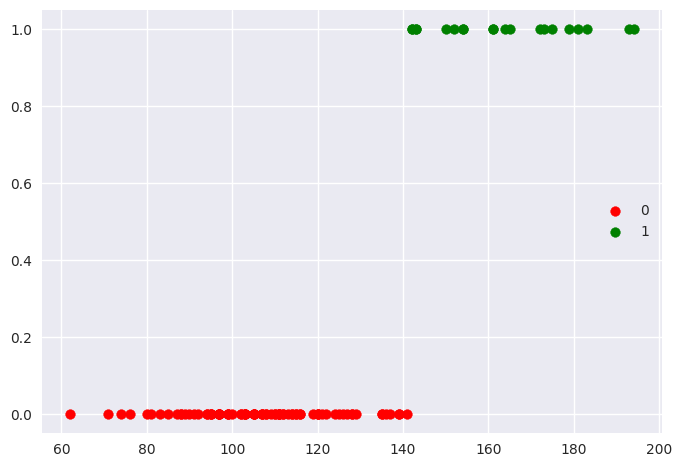

In [236]:
nsample = 100
px = x1_train[:nsample]
py = lin5.predict(x1_train.to_numpy().reshape(-1, 1))[:nsample]

px0 = px[py==0]
px1 = px[py == 1]

py0 = py[py == 0]
py1 = py[py == 1]
plt.scatter(px0, py0, c="red", label="0")
plt.scatter(px1, py1, c="green", label="1")
plt.legend(bbox_to_anchor=(1, .5), loc="center right")

In [237]:
lin5.intercept_

array([-5.10191398])

In [238]:
lin5.coef_

array([[0.03610516]])

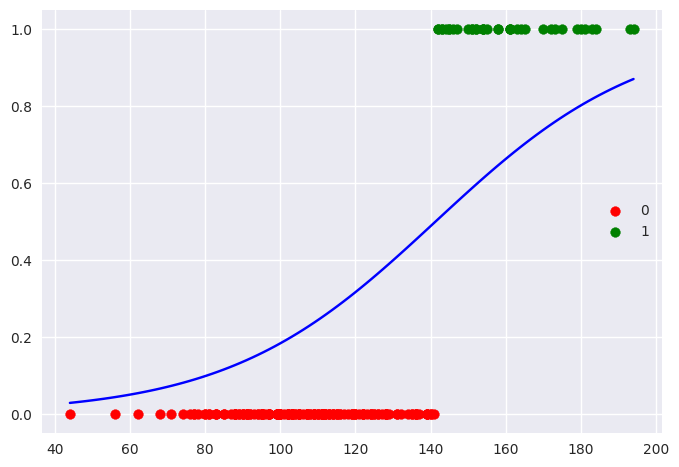

In [240]:
nsample = 200

px = x1_train[:nsample]
py = lin5.predict(x1_train.to_numpy().reshape(-1, 1))[:nsample]

px0 = px[py==0]
px1 = px[py == 1]

py0 = py[py == 0]
py1 = py[py == 1]

sx = np.linspace(np.min(px), np.max(px), 100)
sy = 1 / (1 + np.exp(-(lin5.intercept_ + lin5.coef_[0] *sx )))

plt.scatter(px0, py0, c="red", label="0")
plt.scatter(px1, py1, c="green", label="1")
plt.plot(sx, sy, color="blue")
plt.legend(bbox_to_anchor=(1, .5), loc="center right")

In [241]:
sy

array([0.02893653, 0.03051394, 0.0321745 , 0.03392226, 0.03576146,
       0.03769648, 0.03973189, 0.04187242, 0.04412297, 0.04648861,
       0.04897459, 0.05158631, 0.05432935, 0.05720946, 0.06023252,
       0.06340458, 0.06673183, 0.07022059, 0.07387731, 0.07770853,
       0.08172091, 0.08592116, 0.09031606, 0.09491242, 0.09971706,
       0.10473677, 0.1099783 , 0.11544832, 0.12115336, 0.12709982,
       0.13329388, 0.13974147, 0.14644825, 0.1534195 , 0.16066014,
       0.16817461, 0.17596688, 0.18404031, 0.19239766, 0.20104102,
       0.20997173, 0.21919032, 0.22869648, 0.23848899, 0.24856568,
       0.25892336, 0.26955783, 0.28046376, 0.29163477, 0.30306332,
       0.31474074, 0.32665721, 0.33880178, 0.3511624 , 0.3637259 ,
       0.37647808, 0.38940373, 0.40248669, 0.41570995, 0.42905569,
       0.44250539, 0.45603995, 0.46963974, 0.48328477, 0.49695477,
       0.51062933, 0.524288  , 0.53791042, 0.55147648, 0.56496637,
       0.57836073, 0.59164078, 0.60478837, 0.61778612, 0.63061

In [242]:
px

499    154
720     83
556     97
583    100
150    136
      ... 
104     85
453    119
402    136
701    125
90      80
Name: Glucose, Length: 200, dtype: int64

In [243]:
probs = lin5.predict_proba(x1_valid.to_numpy().reshape(-1, 1))[:, 1]
fpr, tpr, thresh = roc_curve(y_valid, probs)

In [244]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.01960784,
       0.01960784, 0.03921569, 0.03921569, 0.05882353, 0.05882353,
       0.07843137, 0.07843137, 0.11764706, 0.1372549 , 0.1372549 ,
       0.17647059, 0.17647059, 0.19607843, 0.21568627, 0.23529412,
       0.2745098 , 0.35294118, 0.35294118, 0.37254902, 0.37254902,
       0.45098039, 0.45098039, 0.52941176, 0.60784314, 0.66666667,
       0.70588235, 1.        ])

In [245]:
tpr

array([0.        , 0.03846154, 0.11538462, 0.19230769, 0.19230769,
       0.23076923, 0.23076923, 0.53846154, 0.53846154, 0.61538462,
       0.61538462, 0.69230769, 0.69230769, 0.73076923, 0.76923077,
       0.76923077, 0.80769231, 0.80769231, 0.84615385, 0.84615385,
       0.84615385, 0.84615385, 0.88461538, 0.88461538, 0.96153846,
       0.96153846, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [246]:
thresh

array([       inf, 0.88924105, 0.88192654, 0.83885729, 0.81836802,
       0.81293948, 0.80170965, 0.64627394, 0.60400357, 0.58660899,
       0.55120584, 0.47018481, 0.46120126, 0.45224284, 0.43442415,
       0.41677334, 0.39070522, 0.37365717, 0.35691725, 0.34867361,
       0.33245885, 0.30887151, 0.30121779, 0.29367314, 0.27892082,
       0.24409711, 0.23749691, 0.23102063, 0.20051433, 0.1947889 ,
       0.17835924, 0.00604828])

In [247]:
roc_auc = auc(fpr, tpr)

In [248]:
roc_auc

0.8921568627450981

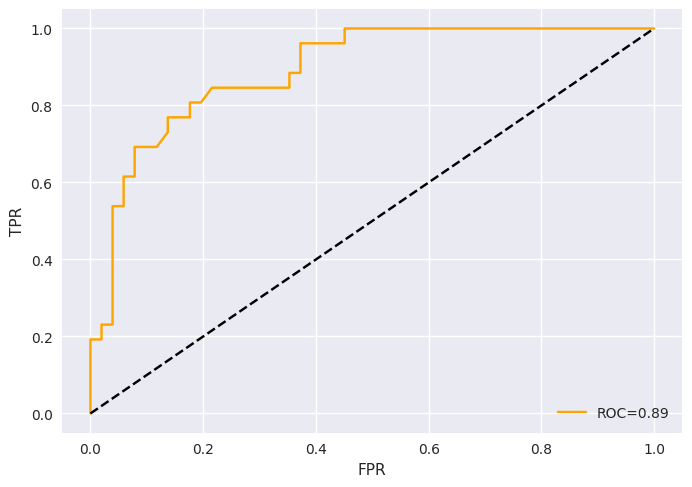

In [249]:
plt.plot(fpr, tpr, color="orange", label=f"ROC={roc_auc:.2f}")
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), ls="--", c="black")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")


In [250]:
pd.DataFrame(classification_report(y1_valid, y5_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.839286,0.921569,0.878505,51.000000
1,0.809524,0.653846,0.723404,26.000000
accuracy,0.831169,0.831169,0.831169,0.831169
macro avg,0.824405,0.787707,0.800954,77.000000
weighted avg,0.829236,0.831169,0.826133,77.000000


In [251]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)

In [252]:
X_train.shape

(691, 8)

In [253]:
y_valid.to_numpy()

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [254]:
(y_valid == 1).sum()

27

In [255]:
(y_valid == 0).sum()

50

In [256]:
(y_train == 1).sum()

241

In [257]:
(y_train == 0).sum()

450

In [258]:
# test with only glucose as feature
feature = "Glucose"
x1_train, x1_valid = X_train[feature], X_valid[feature]
y1_train, y1_valid = y_train.copy(), y_valid.copy()

In [259]:
lin6 = LogisticRegression(penalty="l2", solver="newton-cg", max_iter=30)
lin6.fit(x1_train.to_numpy().reshape(-1, 1), y1_train)
y6_pred = lin6.predict(x1_valid.to_numpy().reshape(-1, 1))
conf_mat, err = get_confusion_matrix(y1_valid, y6_pred)
print(err)
conf_mat

0.8181818181818181


,pred_0,pred_1
actual_0,45,5
actual_1,9,18


In [261]:
pd.DataFrame(classification_report(y1_valid, y6_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.833333,0.900000,0.865385,50.000000
1,0.782609,0.666667,0.720000,27.000000
accuracy,0.818182,0.818182,0.818182,0.818182
macro avg,0.807971,0.783333,0.792692,77.000000
weighted avg,0.815547,0.818182,0.814406,77.000000


In [262]:
lin6 = LogisticRegression(penalty="l2", solver="liblinear", max_iter=30)
lin6.fit(x1_train.to_numpy().reshape(-1, 1), y1_train)
y6_pred = lin6.predict(x1_valid.to_numpy().reshape(-1, 1))
conf_mat, err = get_confusion_matrix(y1_valid, y6_pred)
print(err)
conf_mat

0.8311688311688312


,pred_0,pred_1
actual_0,46,4
actual_1,9,18


In [263]:
pd.DataFrame(classification_report(y1_valid, y6_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.836364,0.920000,0.876190,50.000000
1,0.818182,0.666667,0.734694,27.000000
accuracy,0.831169,0.831169,0.831169,0.831169
macro avg,0.827273,0.793333,0.805442,77.000000
weighted avg,0.829988,0.831169,0.826575,77.000000


In [185]:
y6_pred, y1_valid.to_numpy()

(array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]),
 array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1]))

In [264]:
lin7 = LogisticRegression(penalty="l2", solver="liblinear", max_iter=30, class_weight="balanced")
lin7.fit(x1_train.to_numpy().reshape(-1, 1), y1_train)
y7_pred = lin7.predict(x1_valid.to_numpy().reshape(-1, 1))
conf_mat, err = get_confusion_matrix(y1_valid, y7_pred)
print(err)
conf_mat

0.7792207792207793


,pred_0,pred_1
actual_0,37,13
actual_1,4,23


In [265]:
pd.DataFrame(classification_report(y1_valid, y7_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.902439,0.740000,0.813187,50.000000
1,0.638889,0.851852,0.730159,27.000000
accuracy,0.779221,0.779221,0.779221,0.779221
macro avg,0.770664,0.795926,0.771673,77.000000
weighted avg,0.810025,0.779221,0.784073,77.000000


In [300]:
def get_balanced_confusion_matrix(y_valid, y_pred, weights):
    mat = pd.DataFrame([[0.] * 2, [0] * 2], columns=["pred_0", "pred_1"],
                       index=["actual_0", "actual_1",   ])
    for k in range(2):
        mask = np.equal(y_pred, k)
        act_mat = y_valid[mask]
        mat[f"pred_{k}"] =[ (act_mat == 0).sum(), (act_mat == 1).sum()]
    err =  (mat["pred_1"].iloc[0] + mat["pred_0"].iloc[1])
    err /= mat.sum().sum()
    acc = 1 - err
    
    mat_weighted = mat.copy()
    mat_weighted.loc["actual_0"] /= weights[0]
    mat_weighted.loc["actual_1"] /= weights[1]
    err_weighted = (mat_weighted["pred_1"].iloc[0] + mat_weighted["pred_0"].iloc[1])
    err_weighted /= mat_weighted.sum().sum()
    acc_weighted = 1 - err_weighted
    mat_weighted.index = [s.replace("actual_", "actual_weighted_") for s in mat_weighted.index]
    
    mat = pd.concat([mat, mat_weighted], axis=0)
    return mat, (acc, acc_weighted)
    

In [301]:
weights = {0: np.equal(y1_train, 0).sum(), 1: np.equal(y1_train, 1).sum()}
N_train = y1_train.shape[0]
weights = {0:  1 - weights[0] / N_train, 1: 1 - weights[1] / N_train}
lin8 = LogisticRegression(penalty="l2", solver="liblinear", max_iter=30, class_weight=weights)
lin8.fit(x1_train.to_numpy().reshape(-1, 1), y1_train)
y8_pred = lin8.predict(x1_valid.to_numpy().reshape(-1, 1))
conf_mat, err = get_balanced_confusion_matrix(y1_valid, y8_pred, weights)
print(err)
conf_mat

(0.7792207792207793, 0.7650911848864067)


,pred_0,pred_1
actual_0,37.000000,13.000000
actual_1,4.000000,23.000000
actual_weighted_0,106.087137,37.273859
actual_weighted_1,6.142222,35.317778


In [280]:
weights

{0: 0.3487698986975398, 1: 0.6512301013024602}

In [302]:
pd.DataFrame(classification_report(y1_valid, y8_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.902439,0.740000,0.813187,50.000000
1,0.638889,0.851852,0.730159,27.000000
accuracy,0.779221,0.779221,0.779221,0.779221
macro avg,0.770664,0.795926,0.771673,77.000000
weighted avg,0.810025,0.779221,0.784073,77.000000


In [303]:
weights = {0: np.equal(y1_train, 0).sum(), 1: np.equal(y1_train, 1).sum()}
N_train = y1_train.shape[0]
weights = {0:  1 - weights[0] / N_train, 1: 1 - weights[1] / N_train}
lin8 = LogisticRegression(penalty="l2", solver="newton-cg", max_iter=30, class_weight=weights)
lin8.fit(x1_train.to_numpy().reshape(-1, 1), y1_train)
y8_pred = lin8.predict(x1_valid.to_numpy().reshape(-1, 1))
conf_mat, err = get_balanced_confusion_matrix(y1_valid, y8_pred, weights)
print(err)
conf_mat

(0.7662337662337663, 0.7567828455200469)


,pred_0,pred_1
actual_0,37.000000,13.000000
actual_1,5.000000,22.000000
actual_weighted_0,106.087137,37.273859
actual_weighted_1,7.677778,33.782222


In [304]:
pd.DataFrame(classification_report(y1_valid, y8_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.880952,0.740000,0.804348,50.000000
1,0.628571,0.814815,0.709677,27.000000
accuracy,0.766234,0.766234,0.766234,0.766234
macro avg,0.754762,0.777407,0.757013,77.000000
weighted avg,0.792455,0.766234,0.771152,77.000000


In [323]:
weights = {0: np.equal(y1_train, 0).sum(), 1: np.equal(y1_train, 1).sum()}
N_train = y1_train.shape[0]
weights = {0: .76, 1: 1.42}
lin8 = LogisticRegression(penalty="l2", solver="saga", max_iter=10000, class_weight=weights)
lin8.fit(x1_train.to_numpy().reshape(-1, 1), y1_train)
y8_pred = lin8.predict(x1_valid.to_numpy().reshape(-1, 1))
conf_mat, err = get_balanced_confusion_matrix(y1_valid, y8_pred, weights)
print(err)
conf_mat

(0.7532467532467533, 0.7268356643356644)


,pred_0,pred_1
actual_0,34.000000,16.000000
actual_1,3.000000,24.000000
actual_weighted_0,44.736842,21.052632
actual_weighted_1,2.112676,16.901408


In [ ]:
weights = {0: np.equal(y1_train, 0).sum(), 1: np.equal(y1_train, 1).sum()}
N_train = y1_train.shape[0]
weights = {0: .76, 1: 1.42}
lin8 = LogisticRegression(penalty="l2", solver="saga", max_iter=10000, class_weight=weights)
lin8.fit(x1_train.to_numpy().reshape(-1, 1), y1_train)
y8_pred = lin8.predict(x1_valid.to_numpy().reshape(-1, 1))
conf_mat, err = get_balanced_confusion_matrix(y1_valid, y8_pred, weights)
print(err)
conf_mat

In [311]:
(y1_train == 0).sum()

450

In [312]:
(y1_train == 1).sum()

241

In [313]:
450 / 241

1.8672199170124482

In [315]:
241 / (450 + 241)

0.34876989869753977

In [316]:
35/50

0.7

In [317]:
450 / (450 + 241)

0.6512301013024602

In [318]:
50/35, 50 /65

(1.4285714285714286, 0.7692307692307693)

In [325]:
(450 + 241) / 450

1.5355555555555556

In [326]:
(450 + 241) / 241

2.867219917012448

In [331]:
weights = {0: np.equal(y1_train, 0).sum(), 1: np.equal(y1_train, 1).sum()}
N_train = y1_train.shape[0]
weights = {0: 1.53, 1: 2.86}
lin8 = LogisticRegression(penalty="l2", solver="newton-cg", max_iter=30, class_weight=weights)
lin8.fit(x1_train.to_numpy().reshape(-1, 1), y1_train)
y8_pred = lin8.predict(x1_valid.to_numpy().reshape(-1, 1))
conf_mat, err = get_balanced_confusion_matrix(y1_valid, y8_pred, weights)
print(err)
conf_mat

(0.7662337662337663, 0.7567684878736911)


,pred_0,pred_1
actual_0,37.000000,13.000000
actual_1,5.000000,22.000000
actual_weighted_0,24.183007,8.496732
actual_weighted_1,1.748252,7.692308


In [332]:
2.86/1.53

1.8692810457516338

In [337]:
weights = {0: np.equal(y1_train, 0).sum(), 1: np.equal(y1_train, 1).sum()}
N_train = y1_train.shape[0]
weights = {0: 1.83, 1: 1.}
lin8 = LogisticRegression(penalty="l2", solver="newton-cg", max_iter=30, class_weight=weights)
lin8.fit(x1_train.to_numpy().reshape(-1, 1), y1_train)
y8_pred = lin8.predict(x1_valid.to_numpy().reshape(-1, 1))
conf_mat, err = get_balanced_confusion_matrix(y1_valid, y8_pred, weights)
print(err)
conf_mat

(0.8181818181818181, 0.7506287093853736)


,pred_0,pred_1
actual_0,49.000000,1.000000
actual_1,13.000000,14.000000
actual_weighted_0,26.775956,0.546448
actual_weighted_1,13.000000,14.000000


## Train all features

In [340]:
xfeat = X.copy().to_numpy()
yfeat = y.copy().to_numpy()

In [498]:
xfeat_train, xfeat_valid, yfeat_train, yfeat_valid = train_test_split(xfeat, yfeat, stratify=yfeat, random_state=0, test_size=0.1)

In [499]:
xfeat_train.shape

(691, 8)

In [500]:
xfeat_train

array([[  2.   , 100.   ,  64.   , ...,  29.7  ,   0.368,  21.   ],
       [  7.   , 159.   ,  66.   , ...,  30.4  ,   0.383,  36.   ],
       [ 10.   , 122.   ,  68.   , ...,  31.2  ,   0.258,  41.   ],
       ...,
       [  3.   ,  82.   ,  70.   , ...,  21.1  ,   0.389,  25.   ],
       [  3.   , 169.   ,  74.   , ...,  29.9  ,   0.268,  31.   ],
       [  0.   , 161.   ,  50.   , ...,  21.9  ,   0.254,  65.   ]])

In [501]:
scaler = preprocessing.StandardScaler().fit(xfeat_train)

In [502]:
np.std(scaler.transform(xfeat_train), axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [503]:
n0, n1 = sum(yfeat == 0), sum(yfeat == 1)

In [504]:
n0, n1

(500, 268)

In [505]:
n1/n0

0.536

In [506]:
n0/(n1 + n0), n1 / (n1 + n0)

(0.6510416666666666, 0.3489583333333333)

In [507]:
sample_dist = {0: 65, 1: 35}

In [569]:
def train(x, y, weights=None, max_iter=100, C=1e10):
    model = LogisticRegression(penalty="l2", random_state=0,
                               class_weight=weights,
                               C=1e9,
                               max_iter=max_iter, solver="saga")
    model.fit(x, y)
    
    return model

def evaluate(model, x_valid, y_valid, weights):
    y_pred = model.predict(x_valid)
    report = pd.DataFrame(classification_report(y_valid, y_pred, output_dict=True)).transpose()
    print(y_pred , y_valid)
    conf_mat, acc = get_balanced_confusion_matrix(y_valid, y_pred, weights)
    return {"report": report, "conf_mat": conf_mat, "acc": acc}
    
    

In [570]:
train_x = scaler.transform(xfeat_train)
valid_x = scaler.transform(xfeat_valid)

In [571]:
# No oversampling
m_no_ovsamp = train(train_x, yfeat_train, {0: 1., 1: 1.}, 1000) 

In [572]:
results = evaluate(m_no_ovsamp, valid_x, yfeat_valid, {0: 1., 1: 1.})

[1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1] [1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0
 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 0 1 1]


In [573]:
results["report"]

,precision,recall,f1-score,support
0,0.821429,0.920000,0.867925,50.000000
1,0.809524,0.629630,0.708333,27.000000
accuracy,0.818182,0.818182,0.818182,0.818182
macro avg,0.815476,0.774815,0.788129,77.000000
weighted avg,0.817254,0.818182,0.811964,77.000000


In [574]:
results["conf_mat"]

,pred_0,pred_1
actual_0,46,4
actual_1,10,17
actual_weighted_0,46,4
actual_weighted_1,10,17


In [575]:
results["acc"]

(0.8181818181818181, 0.8181818181818181)

In [576]:
m_no_ovsamp.coef_

array([[ 0.39872013,  1.03343043, -0.24543608,  0.02793599, -0.1087304 ,
         0.6535536 ,  0.32500938,  0.22905715]])

In [577]:
yfeat_valid

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [596]:
# Oversampling
m_ovsamp = train(train_x, yfeat_train, {0: 50./sample_dist[0], 
                                               1: 50. / sample_dist[1]}, 
                 C=1e10, max_iter=100000) 

In [597]:
results = evaluate(m_ovsamp, valid_x, yfeat_valid, {0: 50./sample_dist[0], 
                                               1: 50. / sample_dist[1]})

[1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0
 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 1 1 1] [1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0
 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 0 1 1]


In [598]:
results["report"]

,precision,recall,f1-score,support
0,0.913043,0.840000,0.875000,50.000000
1,0.741935,0.851852,0.793103,27.000000
accuracy,0.844156,0.844156,0.844156,0.844156
macro avg,0.827489,0.845926,0.834052,77.000000
weighted avg,0.853045,0.844156,0.846283,77.000000


In [599]:
results["conf_mat"]

,pred_0,pred_1
actual_0,42.0,8.0
actual_1,4.0,23.0
actual_weighted_0,54.6,10.4
actual_weighted_1,2.8,16.1


In [600]:
results["acc"]

(0.8441558441558441, 0.8426698450536353)

(768, 8)